In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [136]:
house_quarterly = pd.read_csv("D:/School/W200/Project2/summ_2016q1to2018q1_df.csv")
house_quarterly = house_quarterly.drop(columns=["PROGRAM", "DESCRIPTION", "BIOGUIDE_ID"])
house_quarterly

,Unnamed: 0,OFFICE,YEAR,QUARTER,CATEGORY,YTD,AMOUNT
0,0,OFFICE OF THE SPEAKER,2016,2016Q1,SUPPLIES AND MATERIALS,380.00,380.00
1,1,OFFICE OF THE SPEAKER,2016,2016Q1,PERSONNEL COMPENSATION,"1,400,132.67","1,400,132.67"
2,2,OFFICE OF THE SPEAKER,2016,2016Q1,TRAVEL,47.27,47.27
3,3,OFFICE OF THE SPEAKER,2016,2016Q1,"RENT, COMMUNICATION, UTILITIES",102.65,102.65
4,4,OFFICE OF THE SPEAKER,2016,2016Q1,PRINTING AND REPRODUCTION,802.20,802.20
...,...,...,...,...,...,...,...
42846,5044,COMMUNICATIONS SERVICES,2018,Q1,COMMUNICATIONS SERVICES TOTALS:,438868.09,349098.41
42847,5045,COMMUNICATIONS SERVICES,2018,Q1,OFFICE TOTALS:,438868.09,349098.41
42848,5046,CDN ENHANCE,2018,Q1,RENT COMMUNICATION UTILITIES,476060.63,244120.87
42849,5047,CDN ENHANCE,2018,Q1,CDN ENHANCE TOTALS:,476060.63,244120.87


In [135]:
filter = house_quarterly["OFFICE"].str.contains('(?:HON).+''?')
house_quarterly = house_quarterly[~filter]

#Want to strip Fiscal Year from some of the Offices because some are the same office but with fiscal year in front
house_quarterly["OFFICE"] = house_quarterly["OFFICE"].str.replace(r'(\bFISCAL YEAR).(201[7|8])?', '', regex=True)
house_quarterly["OFFICE"] = house_quarterly["OFFICE"].str.lstrip('20178')
house_quarterly["OFFICE"] = house_quarterly["OFFICE"].str.lstrip(" ")


print(len(house_quarterly["OFFICE"].unique())) #Starting with 182 offices



95


In [131]:
house_quarterly["QUARTER"].unique()


array(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', 'Q3',
       'Q4', 'Q1'], dtype=object)

In [134]:
house_quarterly["CATEGORY"] = house_quarterly["CATEGORY"].str.removesuffix('TOTALS:')
house_quarterly

,Unnamed: 0,OFFICE,YEAR,QUARTER,CATEGORY,YTD,AMOUNT
0,0,OFFICE OF THE SPEAKER,2016,2016Q1,SUPPLIES AND MATERIALS,380.00,380.00
1,1,OFFICE OF THE SPEAKER,2016,2016Q1,PERSONNEL COMPENSATION,"1,400,132.67","1,400,132.67"
2,2,OFFICE OF THE SPEAKER,2016,2016Q1,TRAVEL,47.27,47.27
3,3,OFFICE OF THE SPEAKER,2016,2016Q1,"RENT, COMMUNICATION, UTILITIES",102.65,102.65
4,4,OFFICE OF THE SPEAKER,2016,2016Q1,PRINTING AND REPRODUCTION,802.20,802.20
...,...,...,...,...,...,...,...
42846,5044,COMMUNICATIONS SERVICES,2018,Q1,COMMUNICATIONS SERVICES,438868.09,349098.41
42847,5045,COMMUNICATIONS SERVICES,2018,Q1,OFFICE,438868.09,349098.41
42848,5046,CDN ENHANCE,2018,Q1,RENT COMMUNICATION UTILITIES,476060.63,244120.87
42849,5047,CDN ENHANCE,2018,Q1,CDN ENHANCE,476060.63,244120.87


In [110]:
house_quarterly["QUARTER"].unique()

array(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', 'Q3',
       'Q4', 'Q1'], dtype=object)

In [143]:
#Creating new Quarter/Year category
house_quarterly["QUARTER"] = house_quarterly["QUARTER"].str.lstrip('20167')

house_quarterly["YEAR"] = house_quarterly["YEAR"].str.lstrip('FISCAL YEAR')
house_quarterly["YEAR/QUARTER"] = house_quarterly["YEAR"] + "/" + house_quarterly["QUARTER"]
house_quarterly["QUARTER"].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [144]:
#Conversion 
house_quarterly["AMOUNT"] = house_quarterly["AMOUNT"].str.replace(",","", regex=True)
house_quarterly["AMOUNT"] = house_quarterly["AMOUNT"].astype(float)

house_quarterly["YTD"] = house_quarterly["YTD"].str.replace(",","")
house_quarterly["YTD"] = house_quarterly["YTD"].astype(float)

house_quarterly

,Unnamed: 0,OFFICE,YEAR,QUARTER,CATEGORY,YTD,AMOUNT,YEAR/QUARTER
0,0,OFFICE OF THE SPEAKER,2016,Q1,SUPPLIES AND MATERIALS,380.00,380.00,2016/Q1
1,1,OFFICE OF THE SPEAKER,2016,Q1,PERSONNEL COMPENSATION,1400132.67,1400132.67,2016/Q1
2,2,OFFICE OF THE SPEAKER,2016,Q1,TRAVEL,47.27,47.27,2016/Q1
3,3,OFFICE OF THE SPEAKER,2016,Q1,"RENT, COMMUNICATION, UTILITIES",102.65,102.65,2016/Q1
4,4,OFFICE OF THE SPEAKER,2016,Q1,PRINTING AND REPRODUCTION,802.20,802.20,2016/Q1
...,...,...,...,...,...,...,...,...
42846,5044,COMMUNICATIONS SERVICES,2018,Q1,COMMUNICATIONS SERVICES,438868.09,349098.41,2018/Q1
42847,5045,COMMUNICATIONS SERVICES,2018,Q1,OFFICE,438868.09,349098.41,2018/Q1
42848,5046,CDN ENHANCE,2018,Q1,RENT COMMUNICATION UTILITIES,476060.63,244120.87,2018/Q1
42849,5047,CDN ENHANCE,2018,Q1,CDN ENHANCE,476060.63,244120.87,2018/Q1


In [145]:
house_quarterly["OFFICE"].unique()

array(['OFFICE OF THE SPEAKER', 'OFFICE OF THE MAJORITY LEADER',
       'OFFICE OF THE MINORITY LEADER', 'OFFICE OF THE MAJORITY WHIP',
       'OFFICE OF THE MINORITY WHIP', 'DEMOCRATIC CAUCUS',
       'REPUBLICAN CONFERENCE', 'CHIEF ADMIN OFCR OF THE HOUSE',
       'CLERK OF THE HOUSE', 'OFFICE OF GENERAL COUNSEL',
       'SERGEANT AT ARMS', 'OFFICE OF THE PARLIAMENTARIAN',
       'COMPILATION OF PRECEDENTS', 'TECHNICAL ASSISTANTS',
       "FORMER SPEAKER'S STAFF", 'OFFICE OF INSPECTOR GENERAL',
       'LAW REVISION COUNSEL', 'LEGISLATIVE COUNSEL',
       'INTERPARLIAMENTARY AFFAIRS', 'CAO ADVANCED BUSINESS SOLUTION',
       'EMD', 'CAO IMMEDIATE OFFICE', 'TECHNOLOGY INFRASTRUCTURE',
       'FURNISHINGS', 'LIFE CYCLE REPLACEMENT', 'HOUSE RECORDING STUDIO',
       'COMMITTEE RENOVATION PROJECT', 'OTHER ADMINISTRATION',
       'COMMITTEE ON APPROPRIATIONS', 'COMMITTEE ON BUDGET',
       'COMMITTEE ON AGRICULTURE', 'ARMED SERVICES COMMITTEE',
       'COMMITTEE ON FINANCIAL SERVICE', 'COM

In [146]:
data = house_quarterly.groupby(["OFFICE","YEAR/QUARTER"])["AMOUNT"].sum().reset_index(name = "SUM")
data

,OFFICE,YEAR/QUARTER,SUM
0,ADMIN AND OPS,2016/Q1,26190.27
1,ADMIN AND OPS,2016/Q2,19475.28
2,ADMIN AND OPS,2016/Q3,64792.92
3,ADMIN AND OPS,2017/Q1,47405.16
4,ADMIN AND OPS,2017/Q2,74354.31
...,...,...,...
685,VETERANS' AFFAIRS,2017/Q1,2213976.30
686,VETERANS' AFFAIRS,2017/Q2,2515776.39
687,VETERANS' AFFAIRS,2017/Q3,2615501.79
688,VETERANS' AFFAIRS,2017/Q4,3124929.24


In [147]:
#Only find offices that have all the quarters desired (or at least enough over a certain time span)
#For each office that we have data for, breakdown by category again 
for i in data["OFFICE"].unique():
    sub = data[data["OFFICE"] == i]
    if len(sub["YEAR/QUARTER"].unique()) < 5:
        data = data[data.OFFICE != i]
    


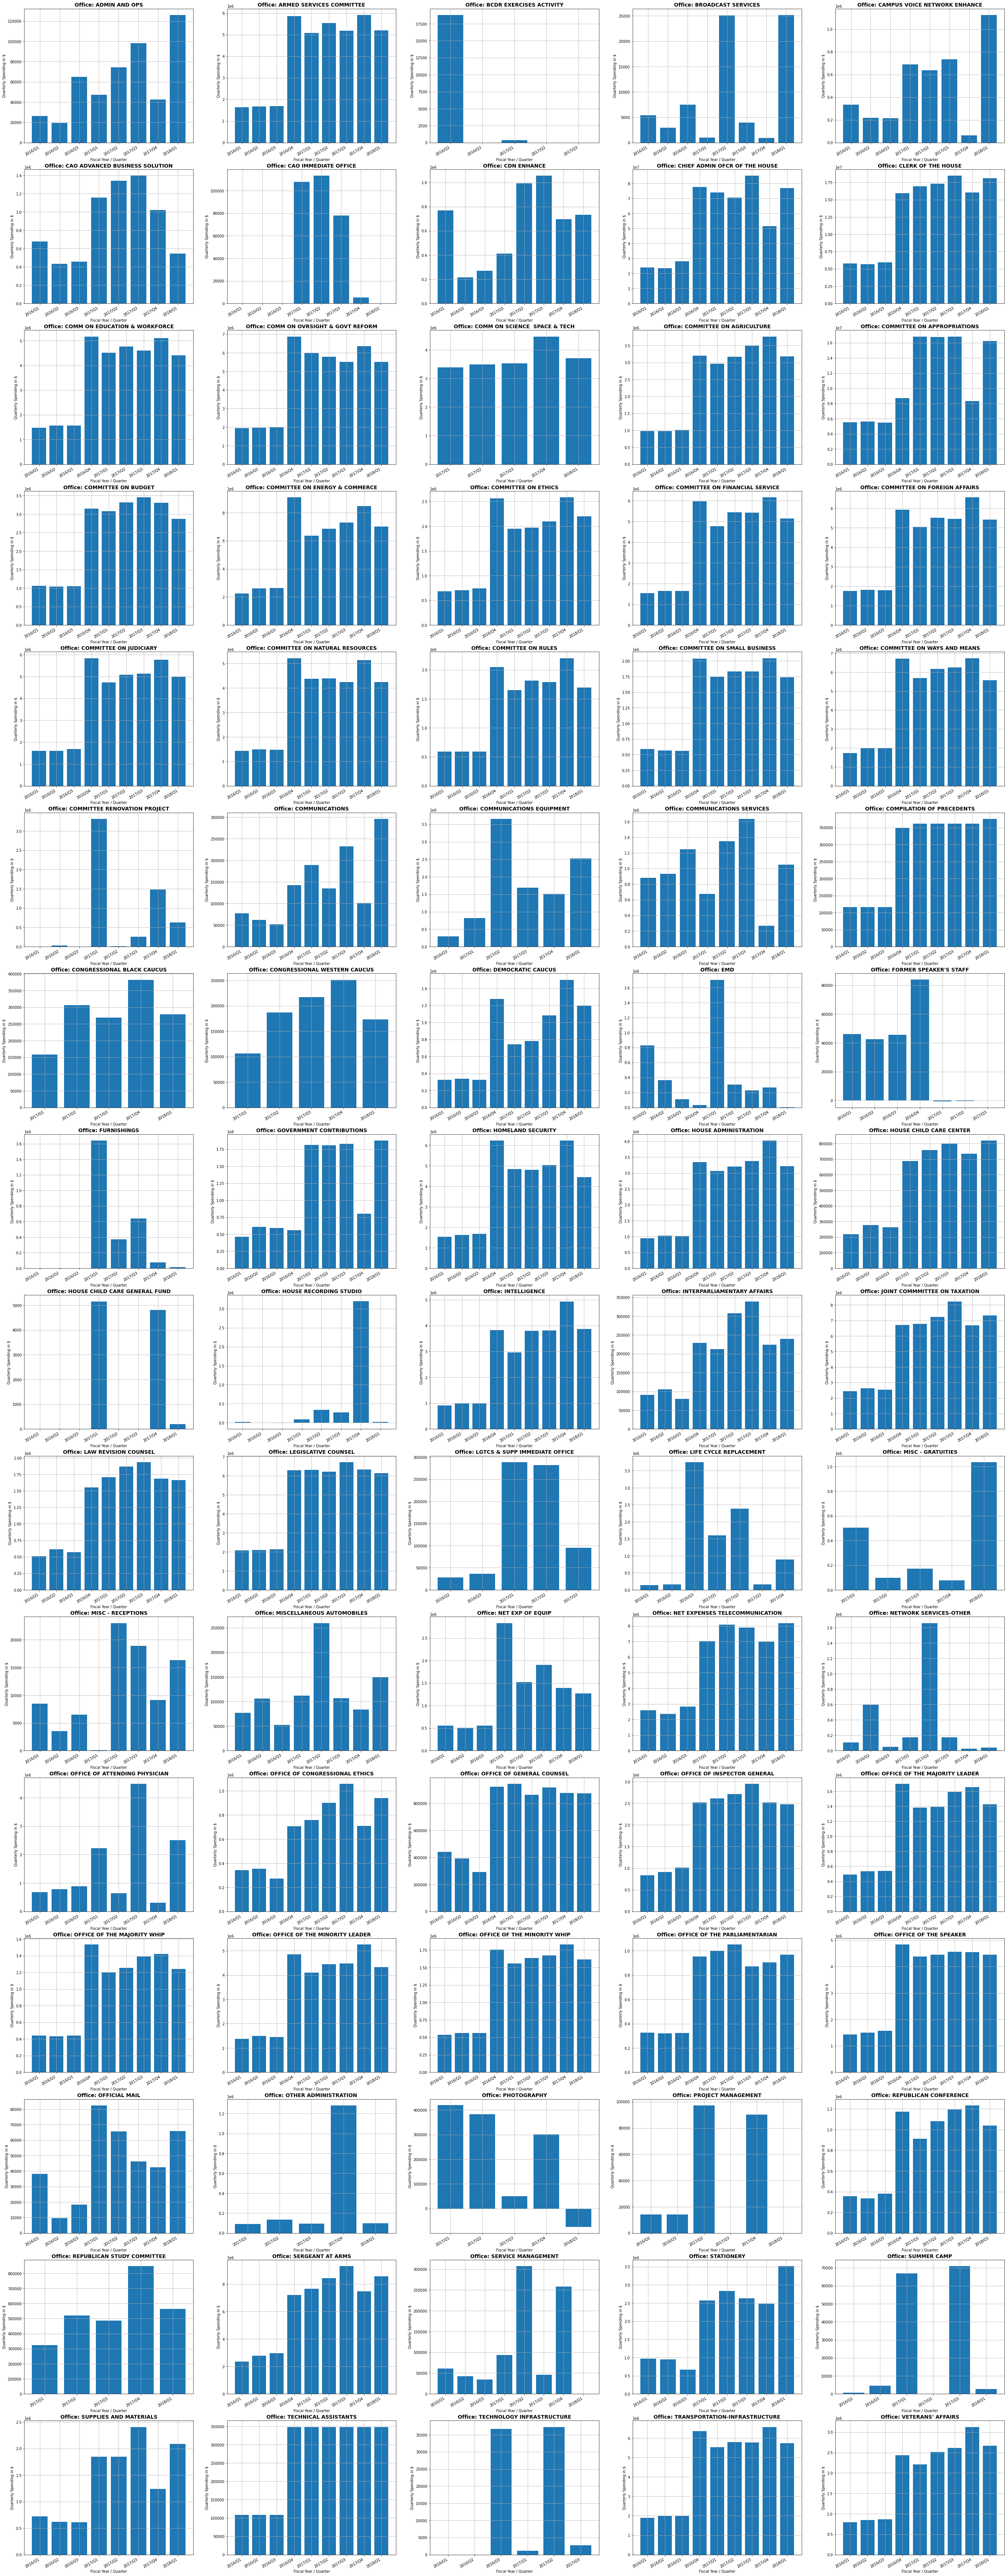

In [148]:

#Let's make 80 barcharts
fig, ax = plt.subplots(nrows=16, ncols=5, figsize=(48,128))
ax = ax.flatten()
for i, name in enumerate(data["OFFICE"].unique()):
    img = data[data["OFFICE"] == name]
    ax[i].bar(img["YEAR/QUARTER"],img["SUM"])
    ax[i].grid()
    ax[i].set_title(f"Office: {name}", fontsize=14, weight='bold')
    ax[i].set_ylabel("Quarterly Spending in $")
    ax[i].set_xlabel("Fiscal Year / Quarter")
    plt.setp(ax[i].get_xticklabels(), rotation = 30, ha = "right")





In [149]:
top10 = house_quarterly.groupby(["OFFICE"])["AMOUNT"].sum().reset_index(name = "SUM")
top10 = top10.sort_values(by="SUM", ascending=False)
top10 = top10.OFFICE.head(10)

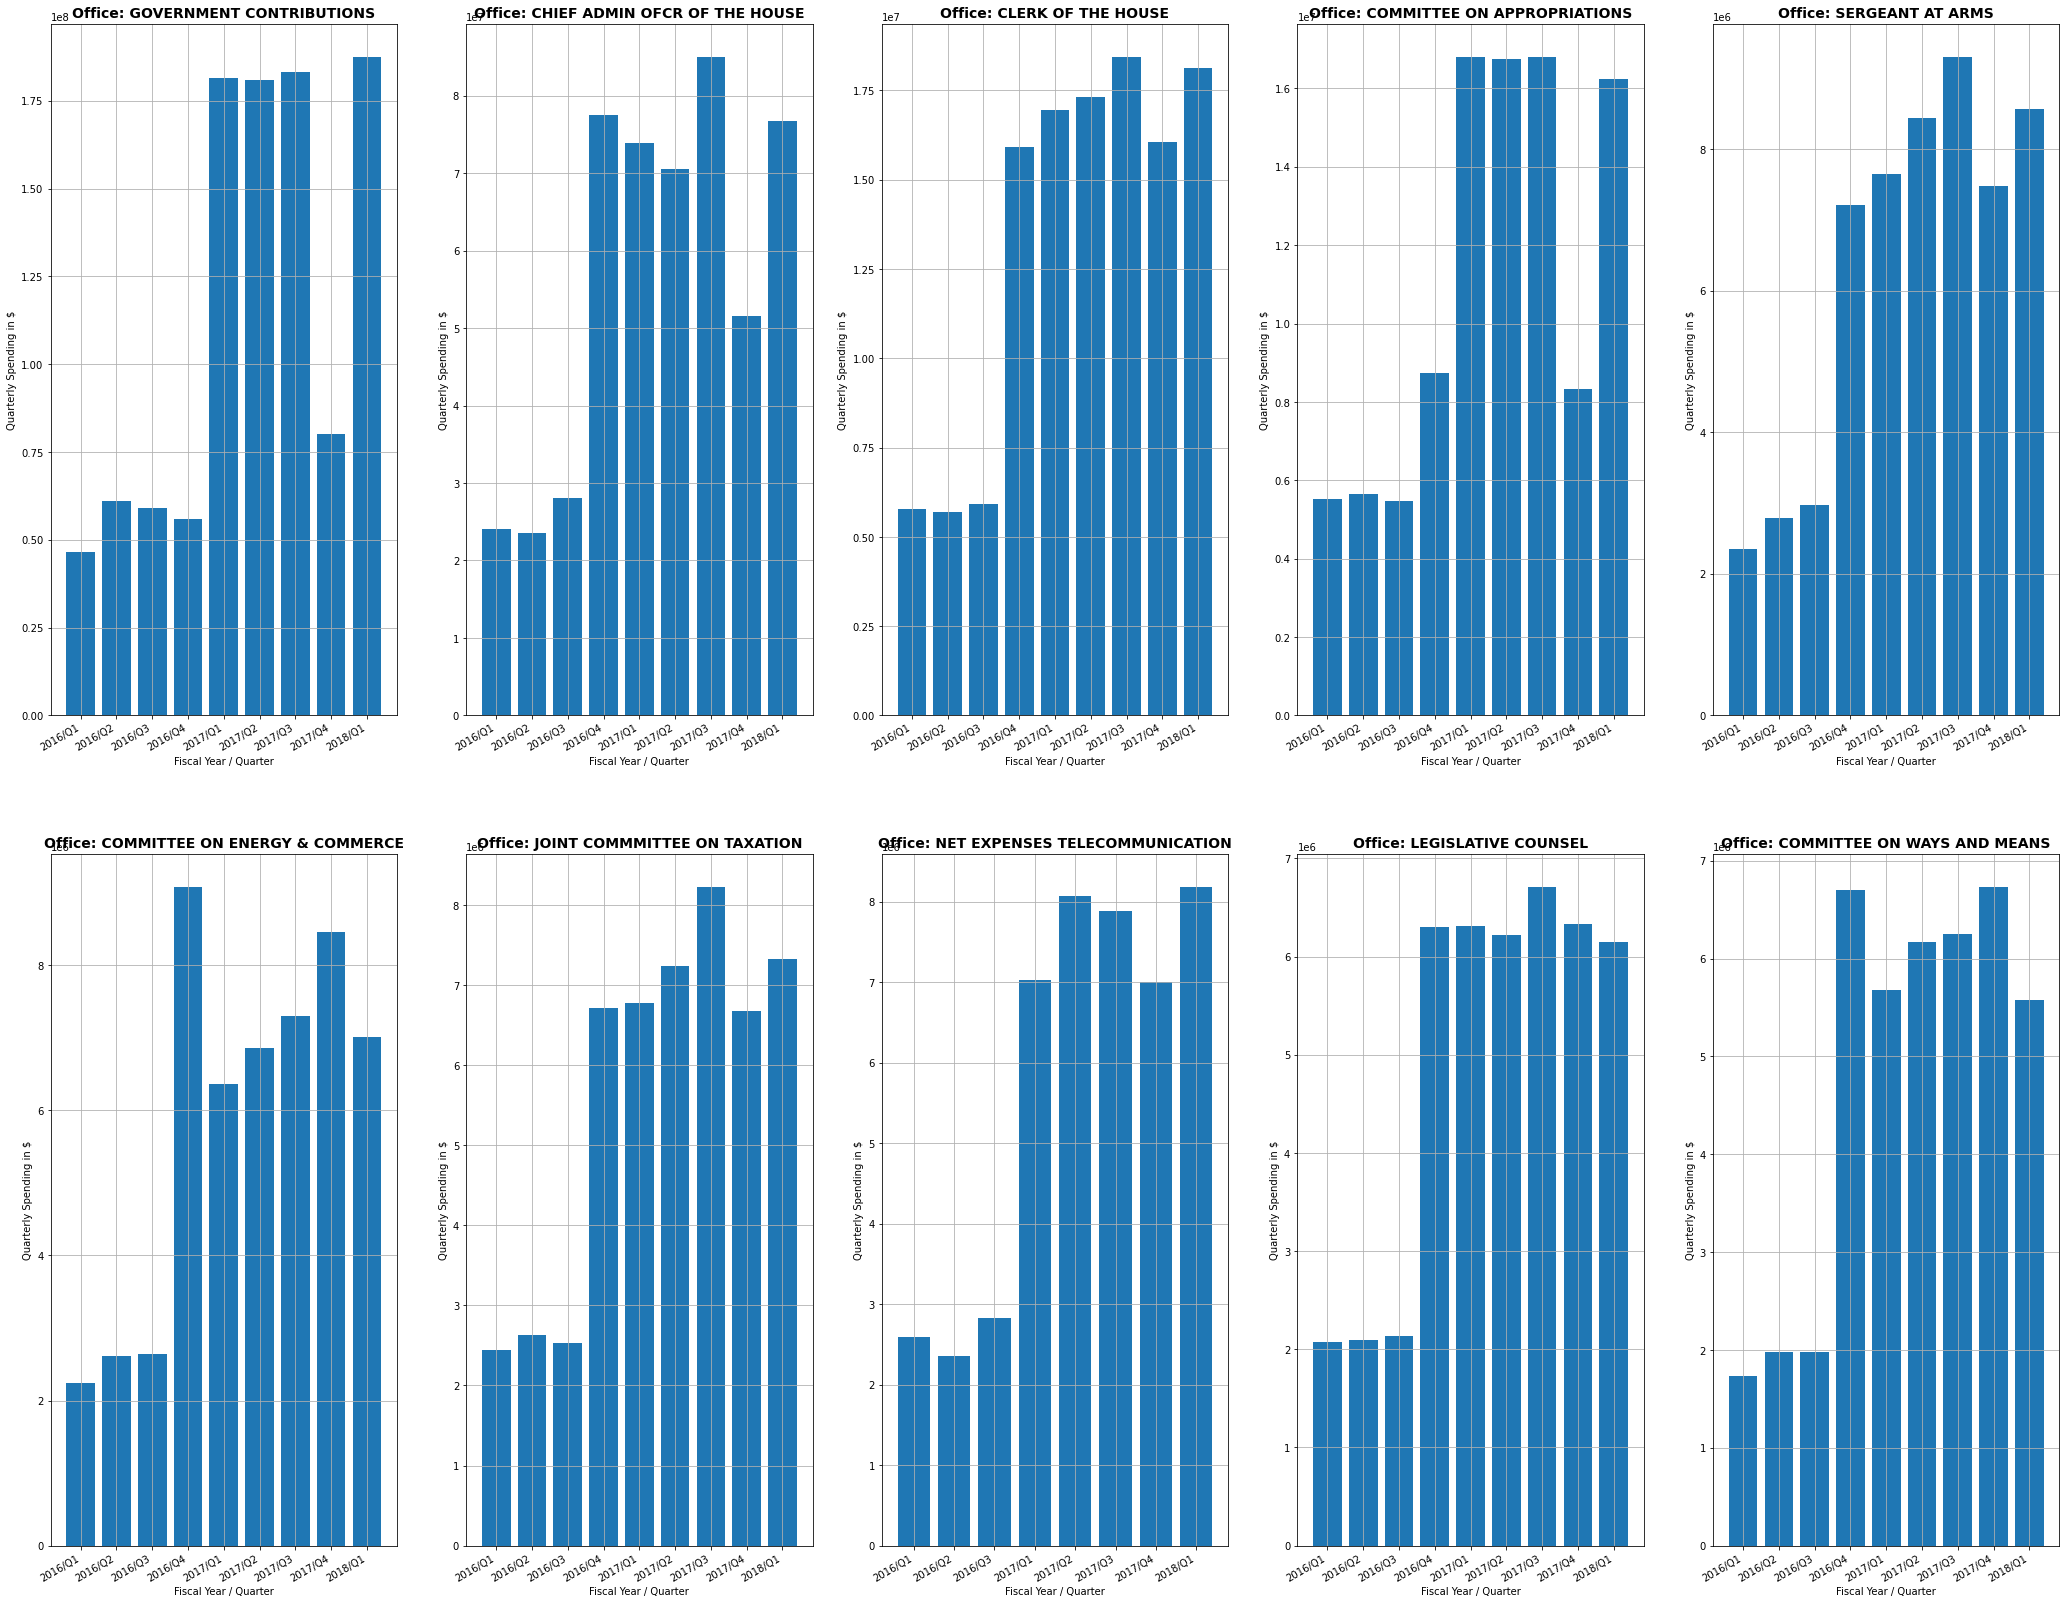

In [150]:
#Plot the top ten quarterly spending 
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(36,28))
ax = ax.flatten()
for i,name in enumerate(top10):
    img = data[data["OFFICE"] == name]
    ax[i].bar(img["YEAR/QUARTER"],img["SUM"])

    ax[i].grid()
    ax[i].set_title(f"Office: {name}", fontsize=14, weight='bold')
    ax[i].set_ylabel("Quarterly Spending in $")
    ax[i].set_xlabel("Fiscal Year / Quarter")
    plt.setp(ax[i].get_xticklabels(), rotation = 30, ha = "right")


In [161]:
data2 = house_quarterly.groupby(["OFFICE"])["AMOUNT"].sum().reset_index(name = "SUM")
data2 = data2.sort_values(by="SUM", ascending=False)
top10 = data2.OFFICE.head(10)
top10

42          GOVERNMENT CONTRIBUTIONS
8      CHIEF ADMIN OFCR OF THE HOUSE
9                 CLERK OF THE HOUSE
15       COMMITTEE ON APPROPRIATIONS
85                  SERGEANT AT ARMS
18    COMMITTEE ON ENERGY & COMMERCE
51      JOINT COMMMITTEE ON TAXATION
61    NET EXPENSES TELECOMMUNICATION
53               LEGISLATIVE COUNSEL
26       COMMITTEE ON WAYS AND MEANS
Name: OFFICE, dtype: object

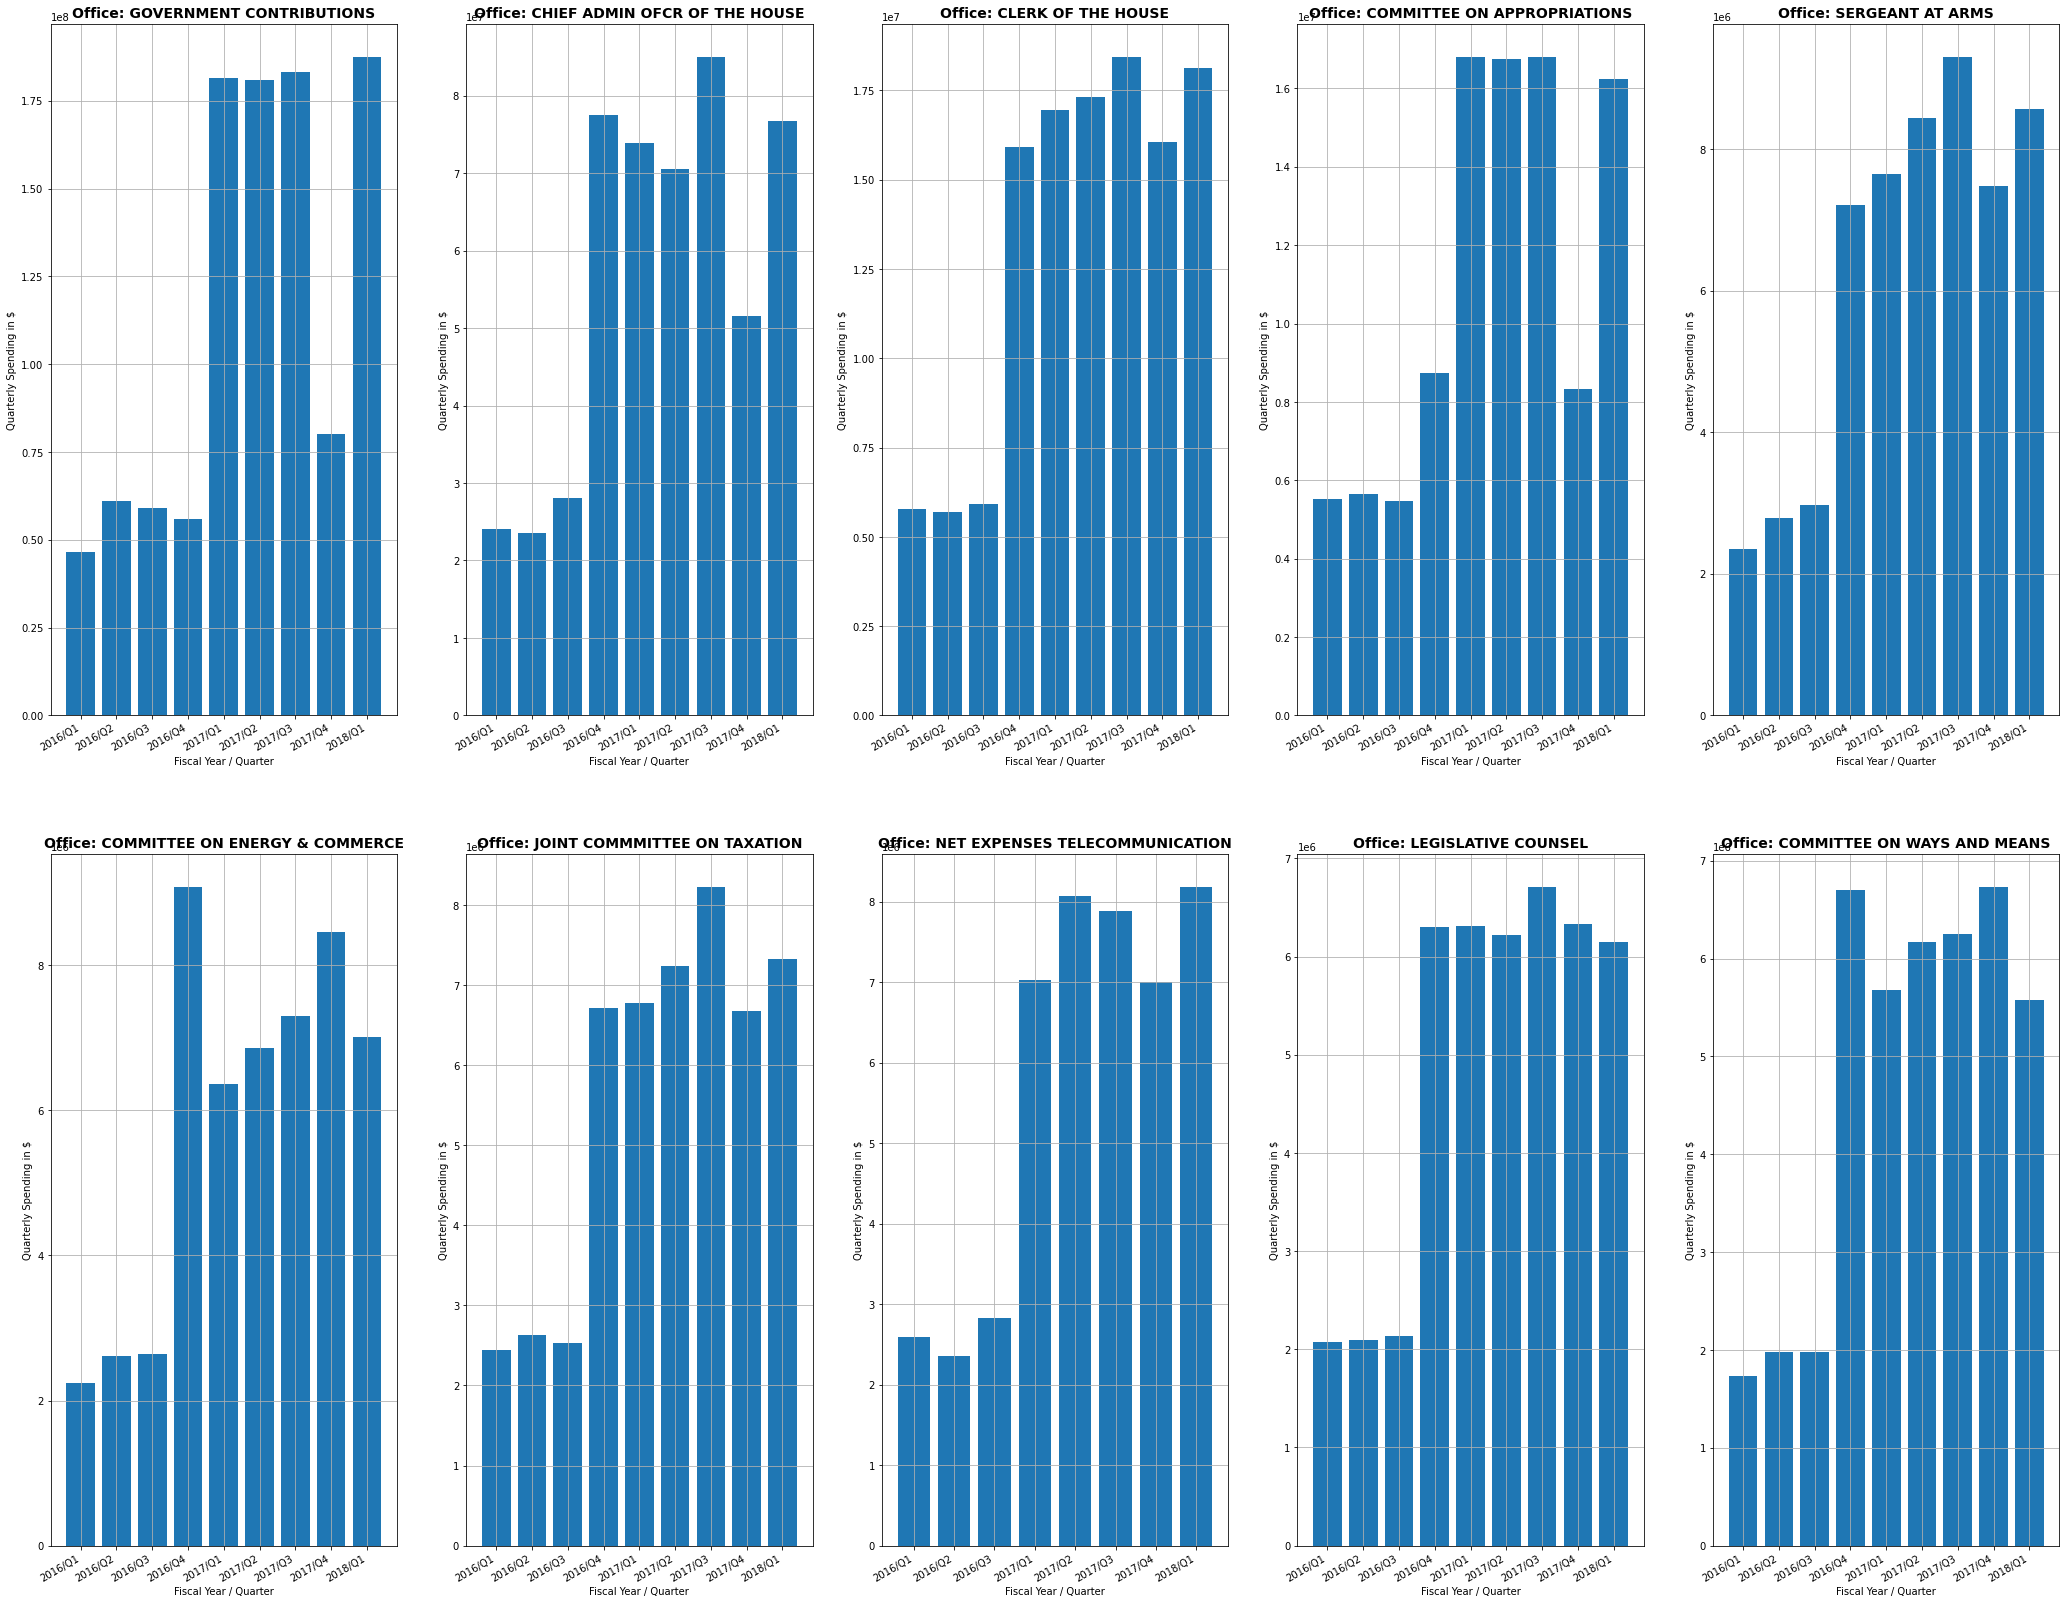

In [163]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(36,28))
ax = ax.flatten()
for i,name in enumerate(top10):
    img = data[data["OFFICE"] == name]
    ax[i].bar(img["YEAR/QUARTER"],img["SUM"])

    ax[i].grid()
    ax[i].set_title(f"Office: {name}", fontsize=14, weight='bold')
    ax[i].set_ylabel("Quarterly Spending in $")
    ax[i].set_xlabel("Fiscal Year / Quarter")
    plt.setp(ax[i].get_xticklabels(), rotation = 30, ha = "right")

In [164]:
new_data = pd.DataFrame()
for i in data["OFFICE"].unique():
    sub = data[data["OFFICE"] == i]
    new_data = new_data.append(sub.loc[sub.SUM == sub.SUM.max()])
new_data

,OFFICE,YEAR/QUARTER,SUM
7,ADMIN AND OPS,2018/Q1,126010.17
15,ARMED SERVICES COMMITTEE,2017/Q4,5912873.31
17,BCDR EXERCISES ACTIVITY,2016/Q2,18791.31
29,BROADCAST SERVICES,2018/Q1,25175.31
37,CAMPUS VOICE NETWORK ENHANCE,2018/Q1,1125378.78
...,...,...,...
664,TECHNICAL ASSISTANTS,2017/Q4,348080.31
665,TECHNICAL ASSISTANTS,2018/Q1,348080.31
670,TECHNOLOGY INFRASTRUCTURE,2017/Q2,37253.34
679,TRANSPORTATION-INFRASTRUCTURE,2017/Q4,6565142.58


In [165]:
data = house_quarterly.groupby(["OFFICE", "CATEGORY"])["AMOUNT"].sum().reset_index(name = "SUM")
for i in new_list:
    print(data[data["OFFICE"]==i])

                       OFFICE                   CATEGORY           SUM
374  GOVERNMENT CONTRIBUTIONS  GOVERNMENT CONTRIBUTIONS   1.502487e+08
375  GOVERNMENT CONTRIBUTIONS                    OFFICE   1.502487e+08
376  GOVERNMENT CONTRIBUTIONS             OTHER SERVICES  6.069602e+05
377  GOVERNMENT CONTRIBUTIONS         PERSONNEL BENEFITS  3.158384e+08
378  GOVERNMENT CONTRIBUTIONS     PERSONNEL COMPENSATION  8.797834e+04
                            OFFICE                         CATEGORY  \
51   CHIEF ADMIN OFCR OF THE HOUSE  ACCESS INFO SYST TECH SERVICES    
52   CHIEF ADMIN OFCR OF THE HOUSE                   ADMIN AND OPS    
53   CHIEF ADMIN OFCR OF THE HOUSE       BANQUET ROOM AUDIO/VISUAL    
54   CHIEF ADMIN OFCR OF THE HOUSE       BENEFITS AND COMPENSATION    
55   CHIEF ADMIN OFCR OF THE HOUSE               CAMPUS NETWORKING    
56   CHIEF ADMIN OFCR OF THE HOUSE             CAO PRIVACY PROGRAM    
57   CHIEF ADMIN OFCR OF THE HOUSE              CAO SAFETY PROGRAM    
58   C

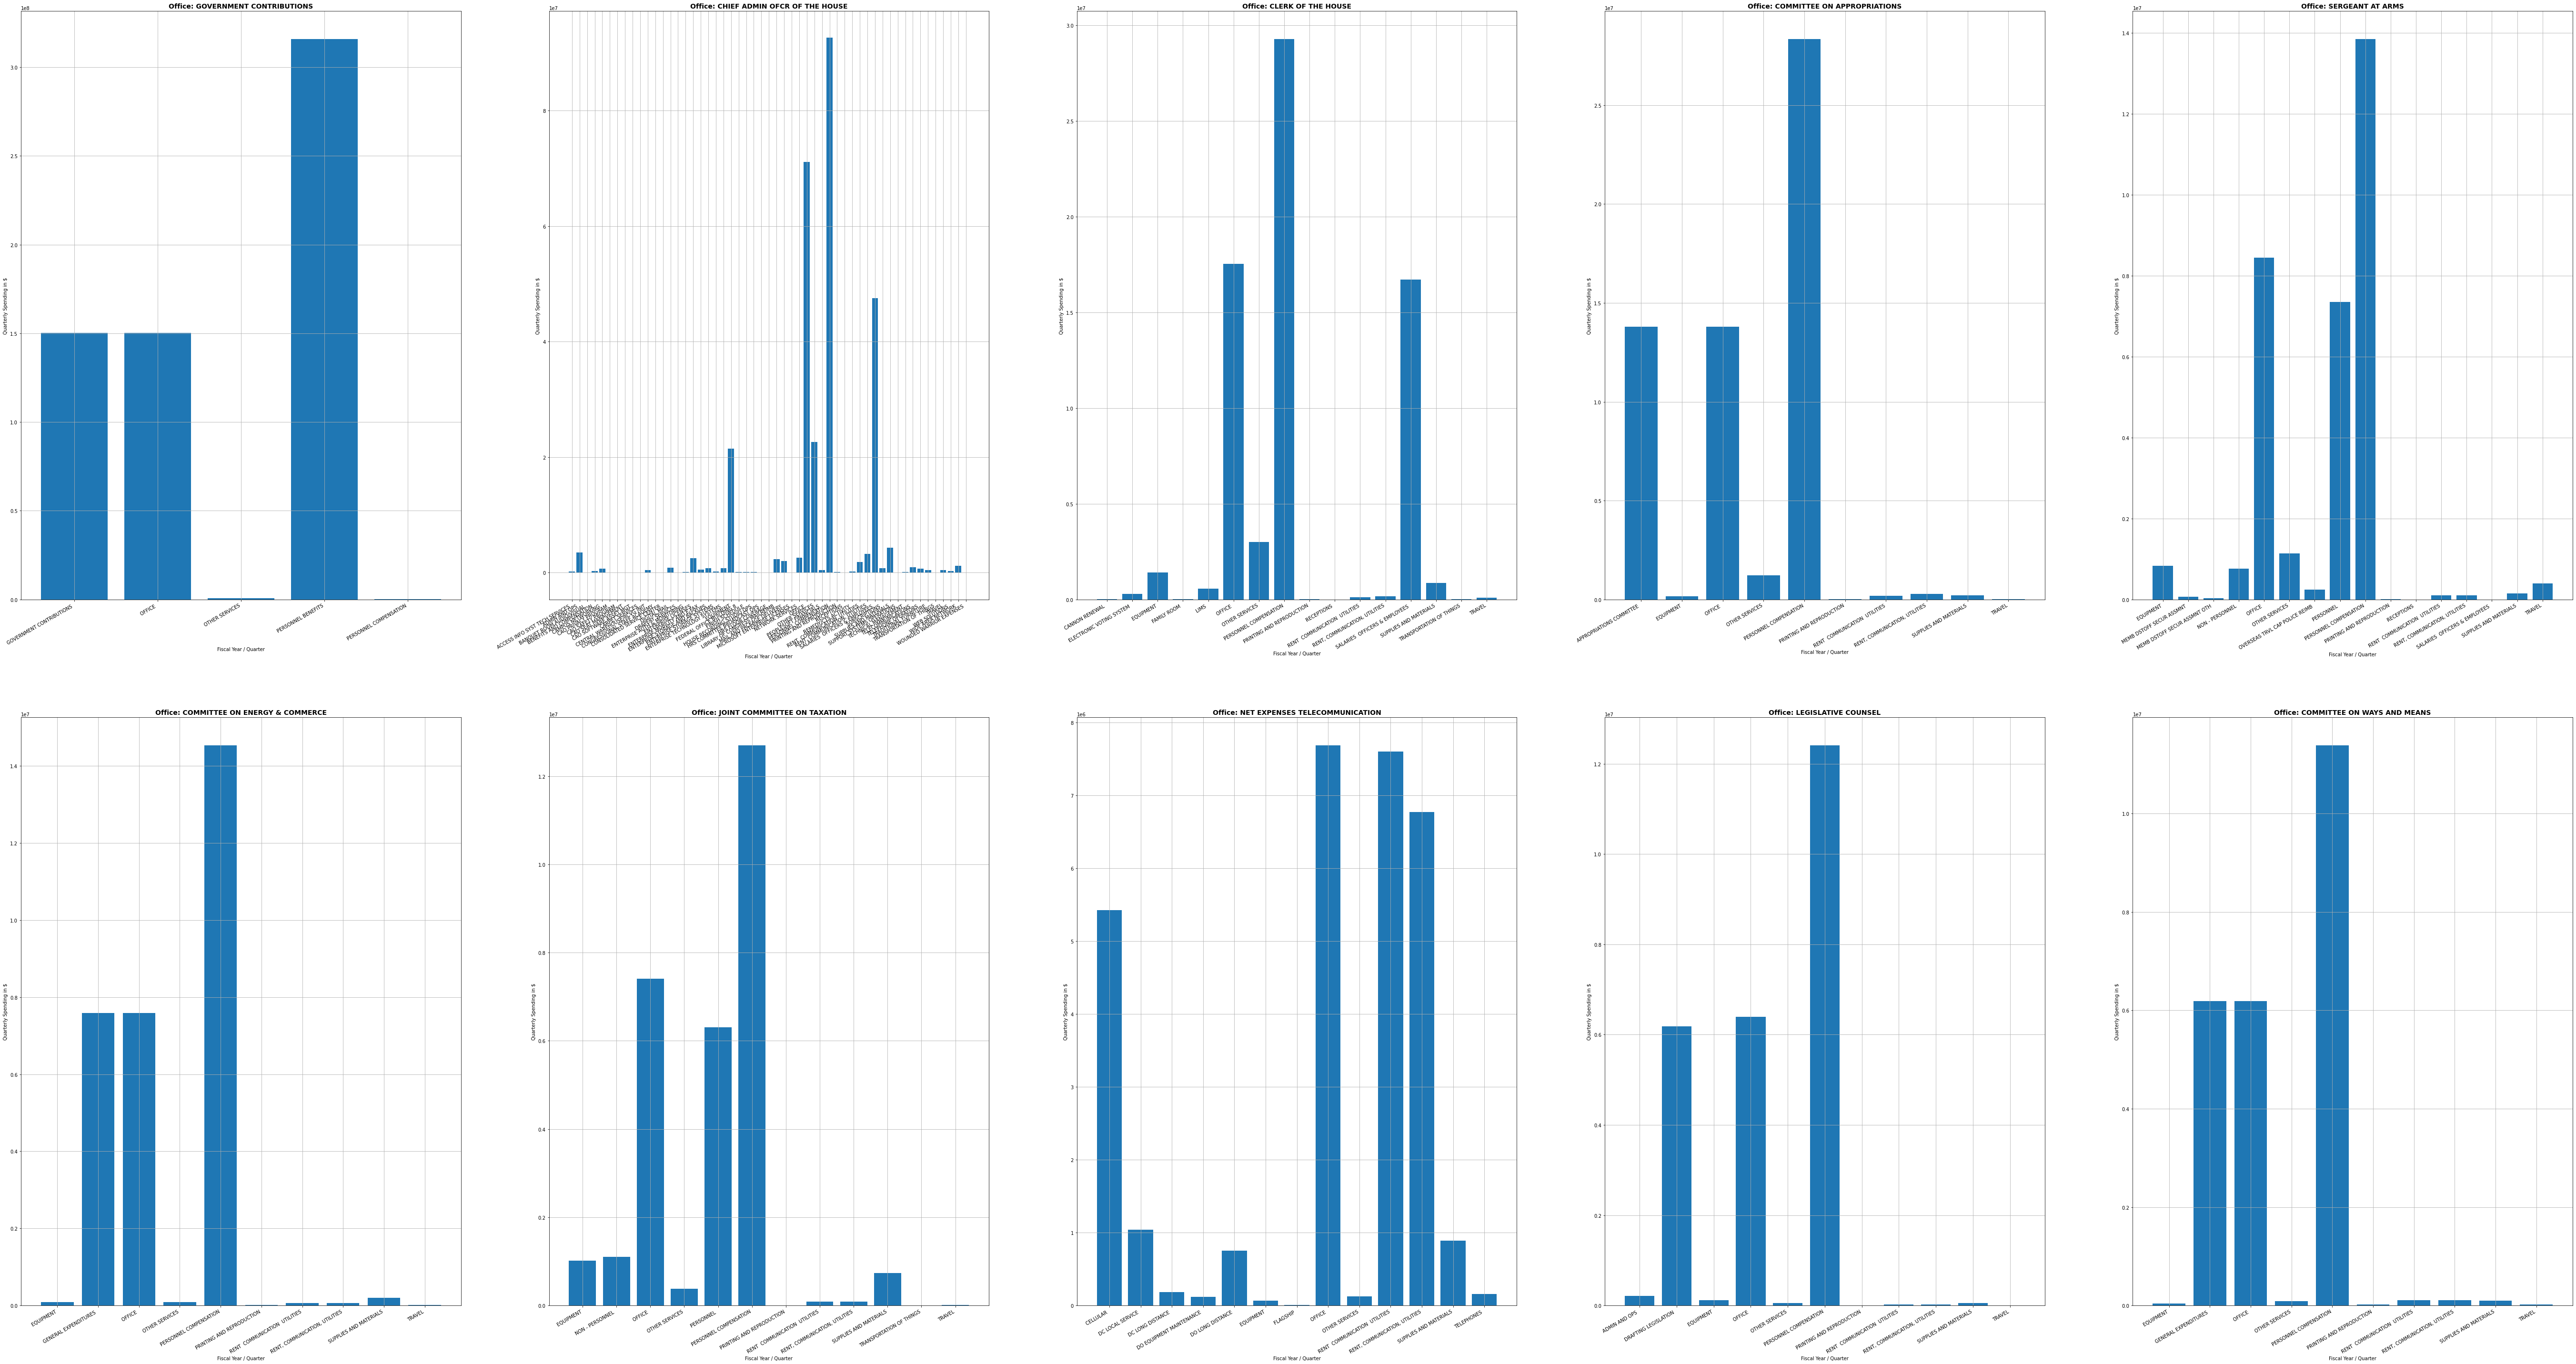

In [168]:
#Plot the categorical spending of the top ten 
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(96,50))
ax = ax.flatten()
for i,name in enumerate(top10):
    img = data[data["OFFICE"] == name]
    ax[i].bar(img["CATEGORY"],img["SUM"])

    ax[i].grid()
    ax[i].set_title(f"Office: {name}", fontsize=14, weight='bold')
    ax[i].set_ylabel("Quarterly Spending in $")
    ax[i].set_xlabel("Fiscal Year / Quarter")
    plt.setp(ax[i].get_xticklabels(), rotation = 30, ha = "right")